In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

from sklearn.decomposition import PCA

In [2]:
plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.size': 8})

## 1. Read & transform data

In [3]:
path_elec = "data/elec2022.txt"
path_part = "data/parties.txt"

Note: I transform file 'parties.csv' to CSV file to facilitate reading

In [13]:
df_party = pd\
    .read_csv(path_part, header=None)\
    .rename(columns={0: 'partyId', 1: 'party_name'})


df_party.head()

,partyId,party_name
0,2,Perussuomalaiset
1,8,Kokoomus
2,6,SDP
3,3,Vihreät
4,10,RKP


In [14]:
df_elect = pd\
    .read_csv(path_elec, header=None, delimiter=' ')\
    .rename(columns={0: 'partyId'})

df_elect.head()

,partyId,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,2,4,4,4,1,4,4,1,2,5,...,1,2,4,4,2,2,2,4,4,5
1,8,4,4,4,2,4,2,5,2,4,...,3,4,4,4,2,4,4,2,4,4
2,6,2,4,5,4,3,4,4,4,5,...,5,5,4,2,4,2,4,1,5,2
3,3,2,5,5,5,5,2,5,5,4,...,4,4,3,1,5,3,4,3,5,5
4,8,4,5,5,5,5,2,5,4,2,...,4,2,4,3,3,4,3,2,4,3


In [15]:
data = df_elect.drop(columns='partyId')

data.head()

,1,2,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
0,4,4,4,1,4,4,1,2,5,4,...,1,2,4,4,2,2,2,4,4,5
1,4,4,4,2,4,2,5,2,4,4,...,3,4,4,4,2,4,4,2,4,4
2,2,4,5,4,3,4,4,4,5,4,...,5,5,4,2,4,2,4,1,5,2
3,2,5,5,5,5,2,5,5,4,4,...,4,4,3,1,5,3,4,3,5,5
4,4,5,5,5,5,2,5,4,2,5,...,4,2,4,3,3,4,3,2,4,3


## 2. Apply PCA

In [20]:
pca = PCA(2)

out = pca.fit_transform(data)

out.shape

(579, 2)

In [21]:
df_elect['pca_0'] = out[:, 0]
df_elect['pca_1'] = out[:, 1]

df_elect.head()

,partyId,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,pca_0,pca_1
0,2,4,4,4,1,4,4,1,2,5,...,4,4,2,2,2,4,4,5,-6.939194,-2.183268
1,8,4,4,4,2,4,2,5,2,4,...,4,4,2,4,4,2,4,4,-1.374556,2.595228
2,6,2,4,5,4,3,4,4,4,5,...,4,2,4,2,4,1,5,2,2.698542,3.444302
3,3,2,5,5,5,5,2,5,5,4,...,3,1,5,3,4,3,5,5,3.407762,5.757854
4,8,4,5,5,5,5,2,5,4,2,...,4,3,3,4,3,2,4,3,0.984550,3.197665


In [29]:
df_elect_group = df_elect\
    [['partyId', 'pca_0', 'pca_1']]\
    .groupby(by='partyId')\
    .mean()

df_elect_group.head()

,pca_0,pca_1
partyId,,
2,-3.869327,-3.807742
3,4.035764,2.155729
4,7.301800,-1.453729
6,3.382399,-0.877257
7,-0.680877,-0.589152


In [30]:
df_fact = df_elect_group.reset_index().merge(df_party, on='partyId')
df_fact.head()

,partyId,pca_0,pca_1,party_name
0,2,-3.869327,-3.807742,Perussuomalaiset
1,3,4.035764,2.155729,Vihreät
2,4,7.301800,-1.453729,Vasemmistoliitto
3,6,3.382399,-0.877257,SDP
4,7,-0.680877,-0.589152,Keskusta


## 3. Plot scatter

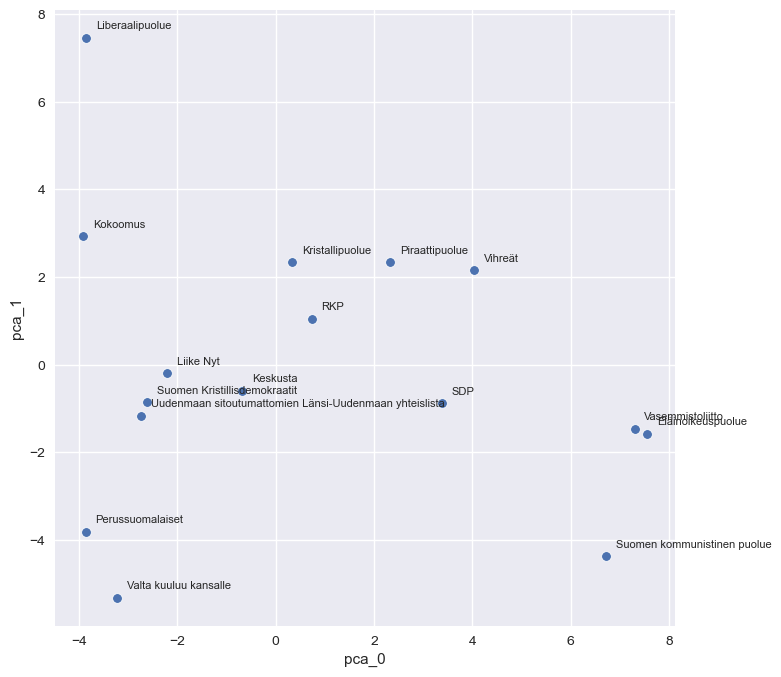

In [32]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# Plot points
sns.scatterplot(df_fact, x='pca_0', y='pca_1', ax=ax)

# Insert labels
for r in df_fact.itertuples():
    ax.text(r.pca_0 +.2, r.pca_1 +.2, r.party_name)